<a href="https://colab.research.google.com/github/Sloba98/Laundry-Image-Classification/blob/restnet-base_model/restnent_traning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
from torch import nn
from torch import optim
from torchvision import models, transforms
from torchvision.models import VGG16_Weights, ResNet50_Weights
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

In [3]:
from PIL import Image
from torchvision import transforms

In [7]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

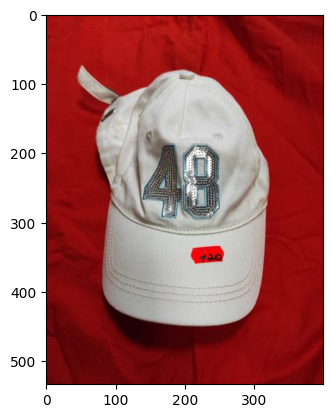

In [10]:
path = '/content/drive/MyDrive/Colab Notebooks/laundry classification/Laundry-Image-Classification/inputs/train/hat/00d94e21-5891-492e-be0e-792e7338c077.jpg'
img = mpimg.imread(path)
imgplot = plt.imshow(img)
plt.show()

In [11]:
class ImageNetPreprocessing(nn.Module):
    def __init__(self):
        super(ImageNetPreprocessing, self).__init__()
        self.mean = torch.tensor([0.485, 0.456, 0.406])
        self.std = torch.tensor([0.229, 0.224, 0.225])

    def forward(self, x):
        mean = self.mean.to(x.device)
        std = self.std.to(x.device)

        x = x[:, [2, 1, 0], :, :]  # Convert RGB to BGR
        x = (x - mean[None, :, None, None]) / std[None, :, None, None]
        return x

In [12]:
def calculate_accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    correct = (preds == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy

In [13]:
num_classes = 10


In [29]:
resnet = models.resnet50(pretrained=True)
for param in resnet.parameters():
    param.requires_grad = False
num_classes = 10
resnet.fc = nn.Linear(resnet.fc.in_features, num_classes)


criterion = nn.CrossEntropyLoss()
learning_rate = 0.008
optimizer = optim.SGD(resnet.parameters(), lr=learning_rate, momentum=0.9)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
resnet.to(device)

learning_rate = 0.001
optimizer = optim.Adam(resnet.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [30]:
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/Colab Notebooks/laundry classification/Laundry-Image-Classification/inputs/train', transform=train_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)

In [ ]:
train_losses = []
train_accuracy = []
num_of_epochs = 10
for epoch in range(num_of_epochs):

    resnet.train()

    running_loss = 0.0
    running_accuracy = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        accuracy = calculate_accuracy(outputs, labels)
        running_loss += loss.item()
        running_accuracy += accuracy
        print(accuracy)
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = running_accuracy / len(train_loader)
    train_losses.append(loss)
    train_accuracy.append(accuracy)
    print(f'Epoch {epoch+1}/20, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')

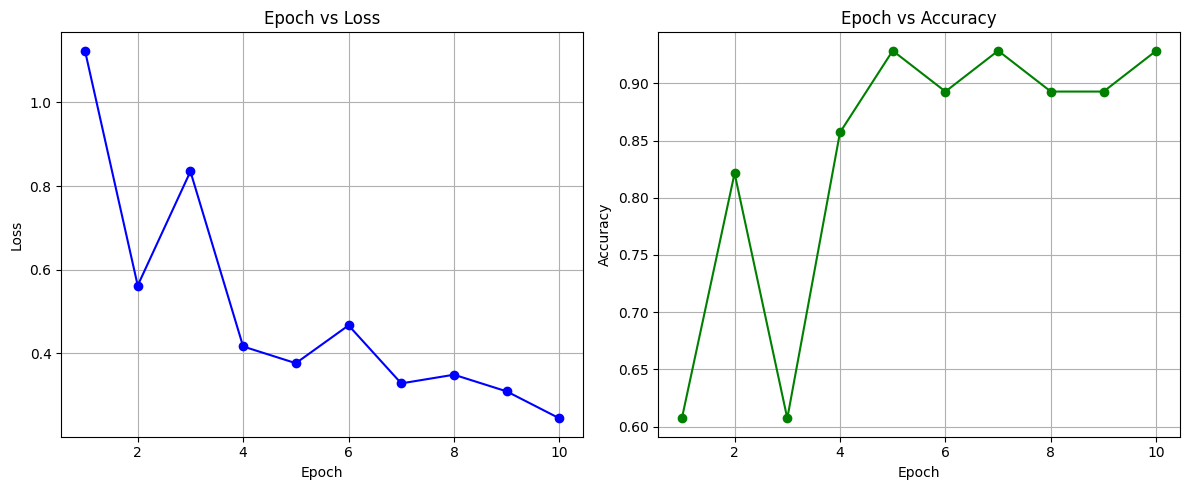

In [36]:

plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(range(1, num_of_epochs + 1), train_losses, marker='o', color='b')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_of_epochs + 1), train_accuracy, marker='o', color='g')
plt.title('Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

In [26]:
def predict_image(model, image_path, transform, device):
    model.eval()  # Set the model to evaluation mode

    # Load and preprocess the image
    image = Image.open(image_path).convert('RGB')
    image = transform(image)
    image = image.unsqueeze(0)  # Add a batch dimension

    # Move image to the appropriate device
    image = image.to(device)

    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)

    return predicted.item()

# Example usage
predict_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Predict the class of a new image
image_path = '/content/drive/MyDrive/Colab Notebooks/laundry classification/Laundry-Image-Classification/inputs/test/hat/c399e385-258a-465c-95d1-ba216c16d7d1.jpg'
predicted_class = predict_image(resnet, image_path, predict_transform, device)
print(f'Predicted class index: {predicted_class}')

AttributeError: 'ResNet' object has no attribute 'epoch'